<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/finance/%EA%B8%88%EC%9C%B5_%EA%B3%B5%ED%95%99_12%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기술적 분석 투자

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/bwb387/btryti76kE0/VHLCxKBekxM70KseNpVoY0/img.png">

* 스캘핑 : 초단타
* 데이트레이딩 : 하루 주기
* 스윙트레이딩 : 2~3일 주기
* 중장기투자 : 3달 이상

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/cV8yp9/btryrWEu6gq/OGCpykSBbTwIbrPvKRDkR0/img.png">

* 추세추종(모멘텀) : 추세를 따라감 (어제 올랐으면 오늘도 오름)
* 역추세추종(컨트래리안) : 평균을 유지함 (어제 내리면 오늘 오름, 어제 오르면 오늘 내림)

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/weTNj/btryt5tUBsr/pjdKwEfDhulrqpmSP4p1ck/img.png">

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/bW64pz/btryrWj9h5s/jKyxkxqlBioeGbQAAkFO5K/img.png">

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/bpOUMB/btryro2j6aV/LaepUNl8xxpKL8KHCXnOO0/img.png">

* 골드크로스/데드크로스

<img  width="700" height="" src="https://blog.kakaocdn.net/dn/bc6mYJ/btryoxrr1Vj/x3n3AXPCk3xkACH6ayTqsk/img.png">

# Backtesting Library
* ref : https://github.com/kernc/backtesting.py

In [ ]:
#pip install backtesting

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10) #df.rolling(10).mean()
        self.ma2 = self.I(SMA, price, 20) #df.rolling(20).mean()

    def next(self):
        if crossover(self.ma1, self.ma2): #골드크로스
            self.buy() #매수
        elif crossover(self.ma2, self.ma1): #데드크로스
            self.sell() #매도


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Row(id='1433', ...)

In [ ]:
print(stats) #백테스팅 결과 출력

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

# Backtrader Labrary
* ref: https://github.com/mementum/backtrader

In [ ]:
#pip install backtrader

## 구동 테스트

In [ ]:
from __future__ import (absolute_import, division, print_function, unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # -----------------------------------------
    # 투자금 설정
    # -----------------------------------------
    cerebro.broker.setcash(100000.0)

    # 마지막 잔액
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


In [ ]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


In [ ]:
#pip install pykrx

In [ ]:
import backtrader as bt
from pykrx import stock
import pandas as pd

"""
다음과 같은 에러 발생
        ImportError: cannot import name 'warnings' from 'matplotlib.dates' (C:\AI\pythonProject\venv\lib\site-packages\matplotlib\dates.py)
해결책  : 현재  matplotlib 3.5.1  --> 3.2.2로 버전 다운
        pip install -U matplotlib==3.2.2 
"""


# 볼린저밴드 : 20일 이동평균선을 기준으로 주가가 어느 위치에 있는지 알려주는 지표
# 상단선: 20일 이동평균선 + 2 * 표준편차
# 하단선: 20일 이동평균선 - 2 * 표준편차

class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    params = ( ("period", 20), ("devfactor", 2), ("debug", False) )

    def log(self, txt, dt=None): # 기록 함수
        ''' Logging function fot this strategy'''
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
                dt = bt.num2date(dt)
                print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self): # 생성자 함수 #볼린저밴드
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor, plot=True)

    # https://jsp-dev.tistory.com/entry/PythonBacktrader-%EB%8B%A4%EC%A4%91-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8C%85-Python-sqlite3backtrader-Mutliple-Data-Feeds-Pandas-DataFrame-to-Backtrader
    def next(self):  #전략 함수
        global size
        if not self.position: # not in the market # 포지션이 없으면(매수/매도가 없음)
            if self.data.low[0] < self.boll.lines.bot[0]: #저가가 볼린저밴드 라인의 바닥보다 아래에 있냐?
                bottom = self.boll.lines.bot[0]
                size = int(self.broker.getcash() / bottom)
                # 최대 구매 가능 개수
                self.buy(price=bottom, size=size) #매수
                # 매수 size = 구매 개수 설정
                self.log('BUY CREATE, %.2f' % (bottom))
                print(size, 'EA')
        else: #포지션이 있는 경우
            if self.data.high[0] > self.boll.lines.mid[0]: #고가가 볼린저밴드 상단선보다 위에 있냐?
                self.sell(price=self.boll.lines.mid[0],size=size)
                # 매도
                self.log('SELL CREATE, %.2f' % (self.boll.lines.mid[0]))
                print(size, 'EA')
#--------------------------------------------------------------------

size=0
ticker =  "005930"
# 전체 종목코드와 종목명 가져오기
# df = df.rename(columns={'시가':'open', '고가':'high', '저가':'low', '종가':'close', '거래량':'volume'})
# df["open"]=df["open"].apply(pd.to_numeric,errors="coerce")

from pykrx import stock
df = stock.get_market_ohlcv("2018-04-28", "2021-05-10", ticker)
df.columns = ["open","high","low","close","volume"]

data = bt.feeds.PandasData(dataname=df) #데이터 넣어주기
cerebro = bt.Cerebro() #백테스팅 총괄자 class

cerebro.broker.setcash(1000000)             #------------------- 투자금액 설정
cerebro.broker.setcommission(0.00015)       #------------------- 0.015% 수수료

for idx, ticker in enumerate(['005930','035720']): #for문으로 기업 데이터 input
    cerebro.adddata(data, name=ticker)                       #------------------- Add the data feed


cerebro.addstrategy(SmaCross)               #------------------- Add the trading strategy
cerebro.run()                               #------------------- run it all

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)


2018-06-29T00:00:00, BUY CREATE, 48618.02
20 EA
2018-08-31T00:00:00, SELL CREATE, 47972.50
20 EA
2018-09-12T00:00:00, BUY CREATE, 44596.24
23 EA
2018-09-20T00:00:00, SELL CREATE, 46490.00
23 EA
2018-10-04T00:00:00, BUY CREATE, 44946.62
24 EA
2019-01-30T00:00:00, SELL CREATE, 45950.00
24 EA
2019-03-07T00:00:00, BUY CREATE, 43898.68
25 EA
2019-03-21T00:00:00, SELL CREATE, 45505.00
25 EA
2020-03-20T00:00:00, BUY CREATE, 43626.40
26 EA
2020-03-24T00:00:00, SELL CREATE, 45865.00
26 EA


In [ ]:
<img  width="700" height="" src="url">

<font size=6><b>유가증권 수익율 계산

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


In [ ]:
def codefind(name):
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return
codefind('카카오')        

035720


# OHLCV Data Load
* yahoo finance를 이용한 삼성전자 주식 가져오기

In [ ]:
df_ss = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')

In [ ]:
df_ss.info()
df_ss.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2018-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       490 non-null    float64
 1   Low        490 non-null    float64
 2   Open       490 non-null    float64
 3   Close      490 non-null    float64
 4   Volume     490 non-null    float64
 5   Adj Close  490 non-null    float64
dtypes: float64(6)
memory usage: 26.8 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938


In [ ]:
df_ss.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

* 종가 그데로 출력하면 다른 상품 가격과 비교하기 힘들다

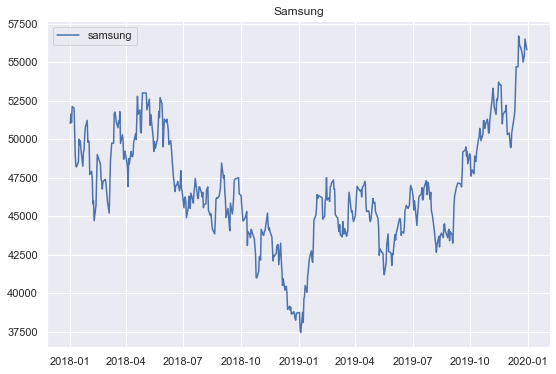

In [ ]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Close'], label='samsung')
plt.legend()


# 일간 변동가 / 변동률

## 변동지수_가격

In [ ]:
last_day = df_ss['Close'].shift(1)
today = df_ss['Close']

df_ss['var_daily_price'] = today - last_day                      # 변동가
df_ss['var_daily_ratio'] = ((today - last_day)/last_day) *100    # 변동율

df_ss.head()


,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


## 변동계수
* 서로 다른 두 자산이 비슷하게 움직이는지 다른 방향으로 움직이는지 알려주는 지표
* 변동계수 = 𝜎(자산수익률의 표준편차) / 자산의 평균(기대)수익률

In [ ]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


In [ ]:
변동계수 = df_ss['var_daily_ratio'].std() / df_ss['var_daily_ratio'].mean()
변동계수

51.35249020430333

               High       Low      Open     Close    Volume  Adj Close  \
Close      0.992806  0.994409  0.985507  1.000000  0.067093   0.970963   
Low        0.993589  1.000000  0.993858  0.994409  0.050810   0.967541   
High       1.000000  0.993589  0.993187  0.992806  0.115526   0.959696   
Open       0.993187  0.993858  1.000000  0.985507  0.076213   0.954788   
Adj Close  0.959696  0.967541  0.954788  0.970963  0.013101   1.000000   

           var_daily_price  var_daily_ratio  
Close             0.126747         0.123115  
Low               0.060805         0.057359  
High              0.054944         0.052464  
Open              0.001946        -0.000263  
Adj Close         0.137663         0.133013  


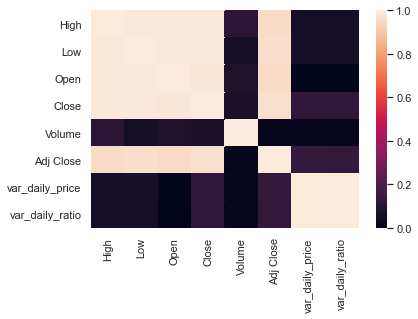

In [ ]:
import seaborn as sns
sns.heatmap(df_ss.corr())
print(df_ss.corr().sort_values(by='Close', ascending=False)[:5])

In [ ]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


## 일간변동률 누적합 .cumsum()

In [ ]:
df_ss['var_daily_ratio'].cumsum()[:5]

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04    0.129903
2018-01-05    2.165925
2018-01-08    1.974060
Name: var_daily_ratio, dtype: float64

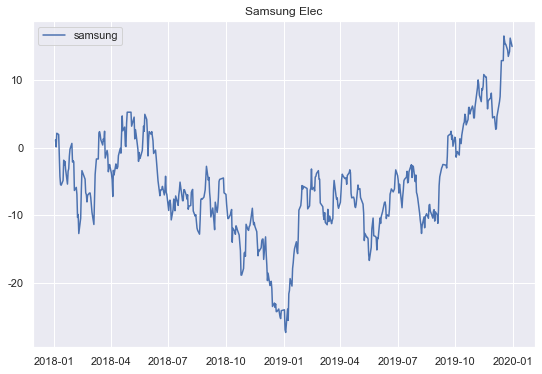

In [ ]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung Elec')
plt.plot(df_ss.index, df_ss['var_daily_ratio'].cumsum(), label='samsung')
plt.legend()


# 이동평균선(이평선)
* N일의 주가지수의 평균 변동률
* 이동평균선 (N일 동안의 주가의 평균 변동률을 이은 선)

In [ ]:
def 이동편균선(day=1):
    df_ss['dayline_'+str(day)] = df_ss['Close'].rolling(day).mean()

In [ ]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


In [ ]:
이동편균선(10)
이동편균선(5)
# myplot(df_ss[['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])
# myplot(df_ss.iloc[:100][['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])

* 이평선은 변동성이 완화된 것처럼 보인다

# 수익률 구하기 
* 가격의 변동을 보고 오늘 기준으로 N일과 비교해서 가감산 금액 구하기

In [ ]:
def 변동지수_가격(day=1):
    df_ss['chg_'+str(day)] = df_ss['Close'].pct_change(periods=day) * 100     

In [ ]:
변동지수_가격(3)
df_ss.head()
# myplot(df_ss.iloc[:100][['Close']], title='변동가(지수)---N일 이익률', labels=['Close'])

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio,dayline_10,dayline_5,chg_3
Date,,,,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN,NaN,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106,NaN,NaN,NaN
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022,NaN,NaN,2.156017
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865,NaN,51572.0,0.774893


In [ ]:
# df_ss['ssv'] = df_ss['Close'].pct_change(periods=1) * 100 
# df_ss = df_ss.fillna(0)
# df_ss.head()
# # df_ss['일별등락률'].cumsum()
# df_ss.columns 

## 보유기간 수익률(holding period return)
* 투자자산을 보유한 기간 동안 몇 %의 수익률을 올렸는가를 측정하는 것으로, 단순한 성과비교용으로 사용
* 보유기간수익률(%) = {[기말의 투자자산(매도가) ÷ 기초의 투자자산(매수가)] - 1} X 100

In [ ]:
df_ss.index.max(), df_ss.index.min(), 

(Timestamp('2019-12-30 00:00:00'), Timestamp('2018-01-02 00:00:00'))

In [ ]:
ago = int(df_ss.iloc[0:1,]['Close'])
# ago = df_ss.iloc[0]['Close']
print(ago)
today = int(df_ss.iloc[252:253]['Close'])   #index.min()
# today = df_ss.iloc[252]['Close']   #index.min()
print(today)
보유기간수익률 = ((ago / today) - 1) * 100
print(보유기간수익률)

51020
40050
27.390761548064923


## 연간 보유기간 수익률 - 기하평균
* 연간 보유기간수익률(%) = {[(최종투자자산 ÷ 최초투자자산)^1/n] - 1} X 100*n : 년수 (ex 2년 6개월이라면 n=2.5 )


In [ ]:
n = 1
연간보유기간수익률 = (pow((today/ ago),1/n) - 1) * 100
print(연간보유기간수익률)

-21.501372010976084


## 기대수익률 - 기하평균
* 호황%30 보통30% 불황30
* 수익률% 20 8 -4
* 12000 10800 9600
* = 0.3 X 0.2 + 0.4 X 0.08 + 0.3 X (-0.04) = 0.08 = 8%

In [ ]:
price = [20/100, 8/100, -4/100]
eco   = [30/100 , 40/100 , 30/100]
기대수익률 = (eco[0]*price[0])  + (eco[1]*price[1])  + (eco[2]*price[2])
기대수익률

0.08

## 가중평균 수익률

In [ ]:
init_price = np.array([4000,4000,2000])
year_earing_rate = np.array([0.25, 0.05,0.1 ])

In [ ]:
res = np.dot(init_price, year_earing_rate.reshape(-1,1))
res

array([1400.])

In [ ]:
price = [12000, 10800, 9600]
price_sum = np.array(price).sum()

price_weight = [12000/price_sum, 10800/price_sum, 9600/price_sum]
eco_rate = [30/100 , 40/100 , 30/100]


price_weight = np.array(price_weight)
eco_rate = np.array(eco_rate).reshape(-1,1)
기대수익률1 = np.dot(price_weight, eco_rate)

기대수익률2 = (eco_rate[0]*price_weight[0])  + (eco_rate[1]*price_weight[1])  + (eco_rate[2]*price_weight[2])
print(기대수익률1, 기대수익률2)
        

[0.33333333] [0.33333333]


# 기대수익(return) 위험성(risk)
* KODEX_200.pkl - KODEX kospi200 ETF
* KODEX_10Y_KTB.pkl - KODEX 국채선물10년 ETF 
* 2012년 1월 20일 부터 2019년 7월 23일

* 복리로 수익률이 누적될 경우 (1+r1)(1+r2)...와 같이 곱셈을 계속 해주어야 합니다. 이 때 로그를 취한다면 곱셈을 덧셈으로 바꿔 줄 수 있습니다

* $로그수익률=\ln (\frac{나중\, \, 주가}{처음\, \, 주가})$

## 자산별 기대수익률 추정하기

In [ ]:
close_df = df_ss['Close'].copy()

In [ ]:
logret_df = np.log(close_df / close_df.shift(1)) 
logret_df.head()

Date
2018-01-02         NaN
2018-01-03    0.011691
2018-01-04   -0.010516
2018-01-05    0.020156
2018-01-08   -0.001920
Name: Close, dtype: float64

In [ ]:
logret_df = logret_df.dropna() 
logret_df.columns = ['KOSPI','KTB']
logret_df.head()

Date
2018-01-03    0.011691
2018-01-04   -0.010516
2018-01-05    0.020156
2018-01-08   -0.001920
2018-01-09   -0.031637
Name: Close, dtype: float64

In [ ]:
m  = logret_df.mean()
ym = logret_df.mean() * 252
print(f"1일 수익률 : {m}")
print("---")
print(f"년 수익률 : {ym}") 

1일 수익률 : 0.00018314142469038914
---
년 수익률 : 0.046151639021978066


* 주식자산(KOSPI)은 1년에 평균적으로 0.024(2.4%)의 로그수익률이 나올 것이다.
* 채권자산(KTB)은 1년에 평균적으로 0.049(4.9%)의 로그수익률이 나올 것이다.

## 포트폴리오의 기대수익률 계산하기
* v=[1,2,3] 이고 w=[4,5,6]
* v.dot(w) -->  $v\, ⋅\, w=1\times 4+2\times 5+3\times 6$

In [ ]:
# 주식 50%, 채권 50%를 가정 
ymarr = ym.values
print(ymarr)
w = np.array([0.7, 0.3]) 
print(w)
# port_return: 포트폴리오의 기대수익률 
port_return = w.dot(ymarr) 
port_return

AttributeError: 'numpy.float64' object has no attribute 'values'

In [ ]:
ws = np.arange(.1, 1, .1) #, dtype=None)
print(ws)
print(ymarr)
retrun_list = {}
for i in ws: 
    w = np.array([i, 1-i]) 
    port_return = w.dot(ymarr) 
    retrun_list[str(w)] = port_return
    print(w, port_return,"")
print(max(retrun_list.values()))

## 자산별 위험(risk)
* 돈을 잃을 가능성(coherent risk measure)
* 수익률의 변동성(volatility) 
* 수익률이 평균으로 부터 많이 움직일수록(편차가 클수록) --> 수익률의 범위가 크다 --> 리스크 크다
* 분산 = 편차의 제곱의 평균
* 표준편차 = 분산에 루트

In [ ]:
# 일수익율 표준편차 
risk = logret_df.std()
# 연수익율 표준편차 
yrisk = risk * np.sqrt(252)
print(risk, yrisk)

* 수익률의 표준편차 : 변동성이 큰 주식(KOSPI)이 채권(KTB) 보다 더 큰 위험을 가지고 있다

## 포트폴리오의 Risk 계산하기
* ㄱㄷㄹ : http://localhost:8888/lab/tree/FT/Untitled.ipynb

$\left[\begin{matrix}VAR[S_1]&COV[S_1,S_2]&\cdots &COV[S_1,S_N]\\COV[S_2,S_1]&VAR[S_2]&\cdots &COV[S_2,S_N]\\\vdots &\vdots &\ddots &\vdots \\COV[S_N,S_1]&COV[S_N,S_2]&\cdots &VAR[S_N]\end{matrix}\right]$



$\sigma _p^2=\omega \ C\ \omega ^{\top }$

In [ ]:
logret_df.cov()

In [ ]:
# cov_mat : 공분산 행렬(Covariance Matrix) 
cov_mat = logret_df.cov() * 252 
cov_mat = cov_mat.values # 행렬구조로 저장합니다 
cov_mat

In [ ]:
# 포트폴리오의 Risk(=표준편차)를 계산합니다. 
port_var = np.dot(np.dot(w, cov_mat), w.T) 
port_std = np.sqrt(port_var) 
print("Portfolio Risk: ", port_std)

# NN 모델 에측

* 계산은 수익률은 예측모델하라고 계산한게 아니라 투자전략 세우라고 있는것이다
* 추가 지표가 별도로 없어서 지표라 생각하고 NN 학습 시도

In [ ]:
df_ss.dropna(axis=0, inplace=True)

In [ ]:
# df_ss = df_ss.fillna(0)

In [ ]:
df_ss = df_ss.drop(['Adj Close'], axis=1)

In [ ]:
df_ss.head()

,High,Low,Open,Close,Volume,var_daily_price,var_daily_ratio,dayline_10,dayline_5,chg_3
Date,,,,,,,,,,
2018-01-15,48980.0,47920.0,48800.0,48540.0,10096000.0,340.0,0.705394,50208.0,48844.0,-0.614251
2018-01-16,50140.0,48620.0,48760.0,50000.0,20389650.0,1460.0,3.007829,50106.0,48764.0,3.648425
2018-01-17,50020.0,49060.0,50020.0,49620.0,11053050.0,-380.0,-0.760000,49906.0,48920.0,2.946058
2018-01-18,50640.0,49820.0,50020.0,49900.0,14848850.0,280.0,0.564289,49788.0,49252.0,2.801813
2018-01-19,50380.0,49040.0,50380.0,49320.0,9219950.0,-580.0,-1.162325,49508.0,49476.0,-1.360000


In [ ]:
split_size = int(df_ss.shape[0] * 0.8)
print(df_ss.shape, split_size)
train = df_ss.iloc[:split_size]
test  = df_ss.iloc[split_size:]
print(train.shape, test.shape)
# print(test_data.shape)

(481, 10) 384
(384, 10) (97, 10)


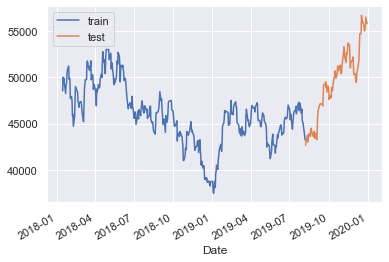

In [ ]:
ax = train['Close'].plot()
test['Close'].plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2018-01-15 to 2019-08-07
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High             384 non-null    float64
 1   Low              384 non-null    float64
 2   Open             384 non-null    float64
 3   Close            384 non-null    float64
 4   Volume           384 non-null    float64
 5   var_daily_price  384 non-null    float64
 6   var_daily_ratio  384 non-null    float64
 7   dayline_10       384 non-null    float64
 8   dayline_5        384 non-null    float64
 9   chg_3            384 non-null    float64
dtypes: float64(10)
memory usage: 33.0 KB


In [ ]:
train.isna().sum()

High               0
Low                0
Open               0
Close              0
Volume             0
var_daily_price    0
var_daily_ratio    0
dayline_10         0
dayline_5          0
chg_3              0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_scaler = scaler.transform(train)
test_scaler  = scaler.transform(test)


In [ ]:
window_size = 5
xlist= []
ylist = []
for i in range(window_size, train_scaler.shape[0]):    
    xlist.append(train_scaler[i-window_size:i])
    ylist.append(train_scaler[i,3])  #Close
x_train, y_train = np.array(xlist), np.array(ylist)

In [ ]:
print(x_train.shape, y_train.shape)

(379, 5, 10) (379,)


In [ ]:
# ! pip install -U numpy

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 10)             840       
                                                                 
 dropout (Dropout)           (None, 5, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_split=0.2, 
                                    callbacks=[early_stop])  #, checkpoint])

Epoch 1/200
19/19 [==============================] - 4s 32ms/step - loss: 0.3075 - mse: 0.3075 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 0.2006 - mse: 0.2006 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0970 - mse: 0.0970 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 4/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 5/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0187 - 

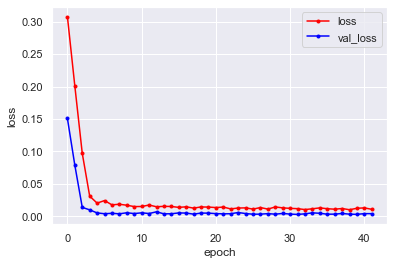

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), history.history['loss'],    marker='.', c='red', label="loss")
plt.plot(np.arange(len(y_loss)), history.history['val_loss'], marker='.', c='blue', label="val_loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
test_scaler.shape

(97, 10)

In [ ]:
window_size = 5
xtlist= []
ytlist = []
for i in range(window_size, test_scaler.shape[0]):    
    xtlist.append(test_scaler[i-window_size:i])
    ytlist.append(test_scaler[i,3])  #Close
x_test, y_test = np.array(xtlist), np.array(ytlist)

In [ ]:
x_test.shape, y_test.shape

((92, 5, 10), (92,))

In [ ]:
pred = model.predict(x_test)

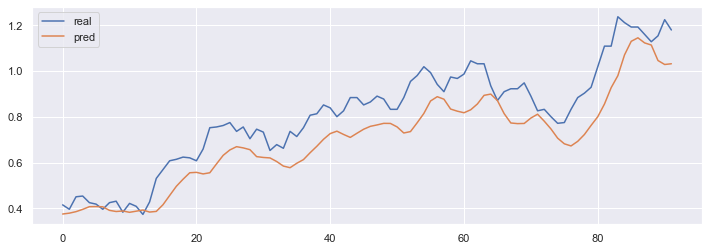

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test, label = 'real')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test, pred)) 


MSE :  0.015635836625575807


# 효율적 투자선

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

import time
from functools import wraps
from xml.etree import ElementTree

import pandas as pd
import numpy as np
from datetime import datetime, date
from pykrx import stock



In [ ]:
# def my_ticker(*names):    
#     df_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
#     df_code.종목코드 = df_code.종목코드.map('{:06d}'.format)
#     df_code = df_code[['회사명', '종목코드']]
#     code_list = []
#     for name in names:
#         code = df_code.query("회사명=='{}'".format(name))['종목코드'].to_string(index=False)
#         code_list.append(code)
#     return code_list
# #     return code.strip()
# my_ticker('삼성전자','현대자동차')

In [ ]:
def my_ticker(names):    
    df_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
    df_code.종목코드 = df_code.종목코드.map('{:06d}'.format)

    df_code = df_code[['회사명', '종목코드']]
    code_list = []
    for name in names:
        code = df_code.query("회사명=='{}'".format(name))['종목코드'].to_string(index=False)
        code_list.append(code)
    return code_list

# stocks = my_ticker(['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER'])
# print(stocks)

In [ ]:
# def logger(func):
#     @wraps(func)
#     def wrapper(*args, **kwargs):
#         start = time.perf_counter()
#         success, failed = func(*args, **kwargs)
#         end = time.perf_counter() - start
#         func_start, func_end = args[0], args[1]
#         print(#f'#date: {func_start} ~ {func_end}, \n',
#               f'#success: {success} item(s), \n',
#               f'#failed: {failed} item(s), \n',
#              )
#     return wrapper
# @logger
def my_krx(start, end, *codes):
    error_list = []
    failed = 0
    success = 0
    for code in codes:
        try:
            df = stock.get_market_ohlcv_by_date(start, end, code)
            df.reset_index(inplace=True)
            df.insert(loc=1, column='종목코드', value=code)
            df.columns = ['date', 'code', 'open', 'high', 'low', 'close','volume']
            success += 1
        except ElementTree.ParseError as e:
            error_list.append(e)
            drop_rows(database, table, code)  # 특정 종목코드에서 에러 발생 시 해당 종목코드에 대한 데이터 삭제 후 다음 종목코드로 넘어감
            failed += 1
            continue
        except Exception as e:
            print('Error occurred : ', e)
            failed += 1
            continue
    print(f'success:{success}, failed:{failed}')
    return df

In [ ]:
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
stock_code = my_ticker(stocks)
print(stock_code)

df = pd.DataFrame()
for i, code in enumerate(stock_code):
    col = stocks[i]
    df[col]= my_krx('20160104', '20180427', code)['close']
df.head()

['005930', '000660', '005380', '035420']
success:1, failed:0
success:1, failed:0
success:1, failed:0
success:1, failed:0


,삼성전자,SK하이닉스,현대자동차,NAVER
0,24100,30150,144000,126579
1,24160,30600,143500,127580
2,23500,30750,140000,124776
3,23260,30200,137500,130585
4,23420,29700,136500,130585


In [ ]:
 
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) #포트폴리오 편입 비중 랜덤으로 계속 돌린다. -> 모든 경우의 수 찾기
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]] 
df

,Returns,Risk,삼성전자,SK하이닉스,현대자동차,NAVER
0,0.212604,0.181361,0.209552,0.136813,0.255188,0.398447
1,0.343733,0.224956,0.771567,0.059622,0.015681,0.153131
2,0.241071,0.179879,0.141388,0.253114,0.360791,0.244707
3,0.291814,0.184793,0.350236,0.224179,0.164491,0.261094
4,0.290981,0.184390,0.280187,0.270111,0.197803,0.251900
...,...,...,...,...,...,...
19995,0.277264,0.185164,0.239383,0.264718,0.188821,0.307079
19996,0.334963,0.194802,0.340124,0.333485,0.209066,0.117325
19997,0.317215,0.194560,0.204727,0.383196,0.241871,0.170205
19998,0.253800,0.207238,0.034179,0.362328,0.548043,0.055450


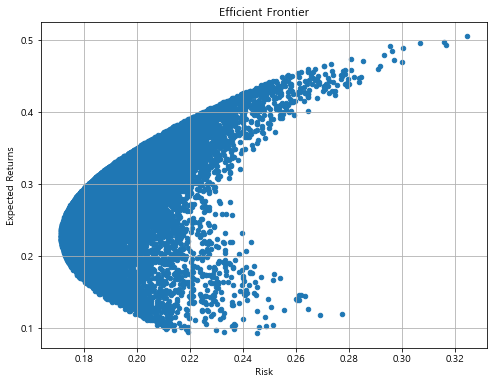

In [ ]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

# 스토캐스틱 오실레이터(Stochastic Oscillator)


<img  width="700" height="" src="https://blog.kakaocdn.net/dn/eo87CL/btrytjGRGP9/AyDEG5QdiafggoDoBQA7kk/img.png">

* <font size=4 color=blue><b>주식투자의 기술적 분석에 사용되는 보조 지표</b></font>
* <font size=4 color=blue><b>최근 n일간의 최고가와 최저가의 범위 내에서 현재 가격의 위치를 표시</b></font>
* <font size=4 color=blue><b> 스토캐스틱n= (현재 가격 - n일중 최저가)/(n일중 최고가 - n일중 최저가)</b></font>
* 대부분 증권사에서는 n(5)-m(3)-t(3)를 사용,  네이버금융은 n(15)-m(5)-t(3) 
* 매수세 > 매도세 : 위치가 높게 형성  --> 과매수 상태에 들어서면 하락 가능성이 커진다
* 매수세 < 매도세 : 위치가 낮게 형성  --> 과매도 상태에 들어서면 상승 가능성이 커진다

## Fast Stochastic 
* 그래프의 변화가 너무 잦고 급격하여 노이즈 즉 가짜 신호가 많아 매수 매도시 참고하기 어렵다
    * Fast %K = (C-L)/(H-L) * 100
    * Fast %D = Fask %K의 m기간 이동평균(SMA)

## Slow Stochastic 
* KDJ Stochastic 지표 : Fast %K (K), Slow %K (D), Slow %D (J) 
    * Slow %K = Fast %K의 m기간 이동평균(SMA)
    * Slow %D = Slow %K의 t기간 이동평균(SMA)

### 최근 15일 중 최고가 15,000원이고 최저가가 10,000, 현재가격이 14,000원 일 경우 스토캐스틱?

In [ ]:
so = (14000 - 10000) / (15000 - 10000) *100
so

80.0

### 최근 15일 중 최고가 15,000원이고 최저가가 10,000, 현재가격이 11,000원 일 경우 스토캐스틱?

In [ ]:
so = (11000 - 10000) / (15000 - 10000) *100
so

20.0

## 활용 예

In [ ]:
import pandas as pd
import datetime as dt
from pykrx import stock
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

### fast_k, slow_k, slow_d

In [ ]:
# Fast %K = n기간 Fast Stochastic 
def my_fast_k(close_price, low, high, n=5):
    #(C-L)/(H-L) * 100
    fast_k = ((close_price - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return fast_k

# Slow %K = Fast %K의 m기간 이동평균(SMA)
def my_slow_k(fast_k, m=3):
    slow_k = fast_k.rolling(m).mean()
    return slow_k

# Slow %D = Slow %K의 t기간 이동평균(SMA)
def my_slow_d(slow_k, t=3):
    slow_d = slow_k.rolling(t).mean()
    return slow_d

### OHLCV data load

In [ ]:
start  = "2021-06-01"
end    = "2021-12-31"
ticker = "005930"
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2021-06-01,80500,81300,80100,80600,14058401
2021-06-02,80400,81400,80300,80800,16414644
2021-06-03,81300,83000,81100,82800,29546007
2021-06-04,82700,82700,81500,82200,18112259
2021-06-07,82700,82800,81600,81900,16496197


In [ ]:
df['fast_k'] = my_fast_k(df['Close'], df['Low'], df['High'], 5)
df['slow_k'] = my_slow_k(df['fast_k'], 3)
df['slow_d'] = my_slow_d(df['slow_k'], 3)
df.head()

,Open,High,Low,Close,Volume,fast_k,slow_k,slow_d
날짜,,,,,,,,
2021-06-01,80500,81300,80100,80600,14058401,NaN,NaN,NaN
2021-06-02,80400,81400,80300,80800,16414644,NaN,NaN,NaN
2021-06-03,81300,83000,81100,82800,29546007,NaN,NaN,NaN
2021-06-04,82700,82700,81500,82200,18112259,NaN,NaN,NaN
2021-06-07,82700,82800,81600,81900,16496197,62.068966,NaN,NaN


In [ ]:
df = df.dropna(axis=0)

### plot

* 캐스틱이 80 이상일 때 과매수 상태, 20 이하일 때 과매도 상태로 판단
    * 골든크로스(매수) : 스토캐스틱 20 이하에서 <font color=blue>%K선</font>이 <font color='red'>%D</font>선을 상향 돌파
    * 데드크로스(매도) : 스토캐스틱 80 이상에서 <font color=blue>%K선</font>이 <font color='red'>%D</font>선을 하향 돌파
*   0% : N일간 최저가(가장 강한 매수세)
* 100% : N일간 최고가(가장 강한 매도세)


+매수 2021-07-08  0.00
+매수 2021-08-17  2.38
+매수 2021-08-18  11.94
+매수 2021-08-19  0.00
+매수 2021-08-20  5.71
-매도 2021-09-06  90.91
+매수 2021-10-07  11.11
+매수 2021-10-08  10.71
+매수 2021-10-12  6.98
+매수 2021-10-13  11.11
-매도 2021-12-07  95.08
-매도 2021-12-09  91.11
-매도 2021-12-21  81.82
-매도 2021-12-27  81.82


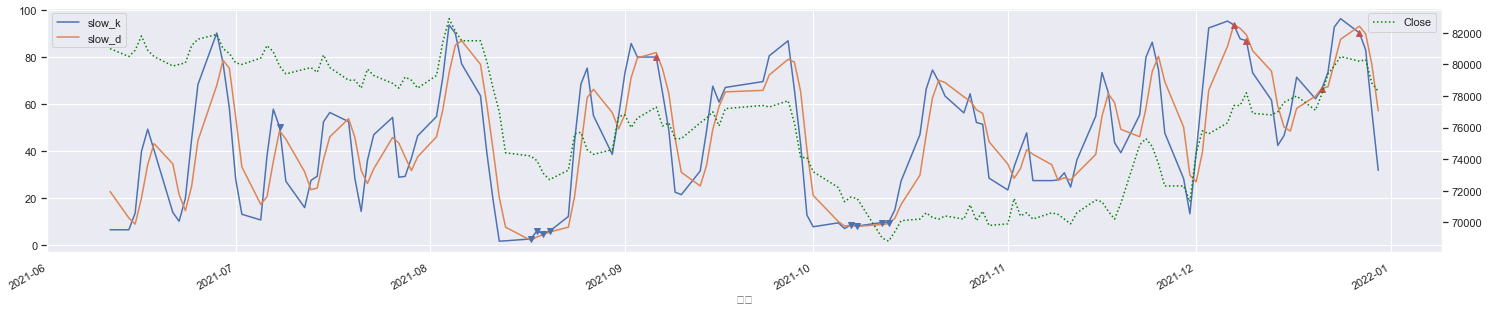

In [ ]:
fig, ax1 = plt.subplots(figsize = (25, 5))

# Slow %K, Slow %D를 그려서 확인
df[['slow_k', 'slow_d']].plot(ax=ax1)
# ax.hlines([20,80], df.index.min(), df.index.max(), color ="green", linestyle="--")

for i in range(len(df.index)):
    if df["fast_k"].values[i] <= 20 and (df["slow_k"].values[i] > df["slow_d"].values[i]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['fast_k'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['slow_k'].values[i], 'bv')
    elif df["fast_k"].values[i] >= 80 and (df["slow_k"].values[i] < df["slow_d"].values[i]) :  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['fast_k'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['slow_k'].values[i], 'r^')    

ax2 = ax1.twinx()
df['Close'].plot(ax=ax2,  color='green', linestyle='dotted')
ax2.grid(False)
ax2.legend()

plt.show()

# TA-Lib

* https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html
* https://github.com/mrjbq7/ta-lib

In [5]:
#pip install talib-binary

In [4]:
import numpy
import talib
from talib.abstract import *

## STOCH - Stochastic
* slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)


In [ ]:
slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'], 
                           fastk_period=5, 
                           slowk_period=3, slowk_matype=0, 
                           slowd_period=3, slowd_matype=0)

In [ ]:
slowk.tail()

날짜
2021-12-24    96.458333
2021-12-27    90.397727
2021-12-28    83.106061
2021-12-29    56.620553
2021-12-30    31.816962
dtype: float64

In [ ]:
slowd.tail()

날짜
2021-12-24    87.668533
2021-12-27    93.251263
2021-12-28    89.987374
2021-12-29    76.708114
2021-12-30    57.181192
dtype: float64

## STOCHF - Stochastic Fast
* fastk, fastd = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)


In [ ]:
fastk, fastd = talib.STOCHF(df['High'], df['Low'], df['Close'],  
                            fastk_period=5, 
                            fastd_period=3, fastd_matype=0)

In [ ]:
fastk.tail()

날짜
2021-12-24    92.500000
2021-12-27    81.818182
2021-12-28    75.000000
2021-12-29    13.043478
2021-12-30     7.407407
dtype: float64

## df 값 비교

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,fast_k,slow_k,slow_d
날짜,,,,,,,,
2021-12-24,80200,80800,80200,80500,12086380,92.500000,96.458333,87.668533
2021-12-27,80600,80600,79800,80200,10783368,81.818182,90.397727,93.251263
2021-12-28,80200,80400,79700,80300,18226325,75.000000,83.106061,89.987374
2021-12-29,80200,80200,78500,78800,19794795,13.043478,56.620553,76.708114
2021-12-30,78900,79500,78100,78300,14236700,7.407407,31.816962,57.181192
